In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import quad
%matplotlib inline
from importlib import reload
import Thermodynamics
reload(Thermodynamics)
from Thermodynamics import *

Accepted 7524 out of 9999 samples: 75.2% acceptance rate
Accepted 9512 out of 9999 samples: 95.1% acceptance rate
Accepted 9816 out of 9999 samples: 98.2% acceptance rate
Accepted 9959 out of 9999 samples: 99.6% acceptance rate


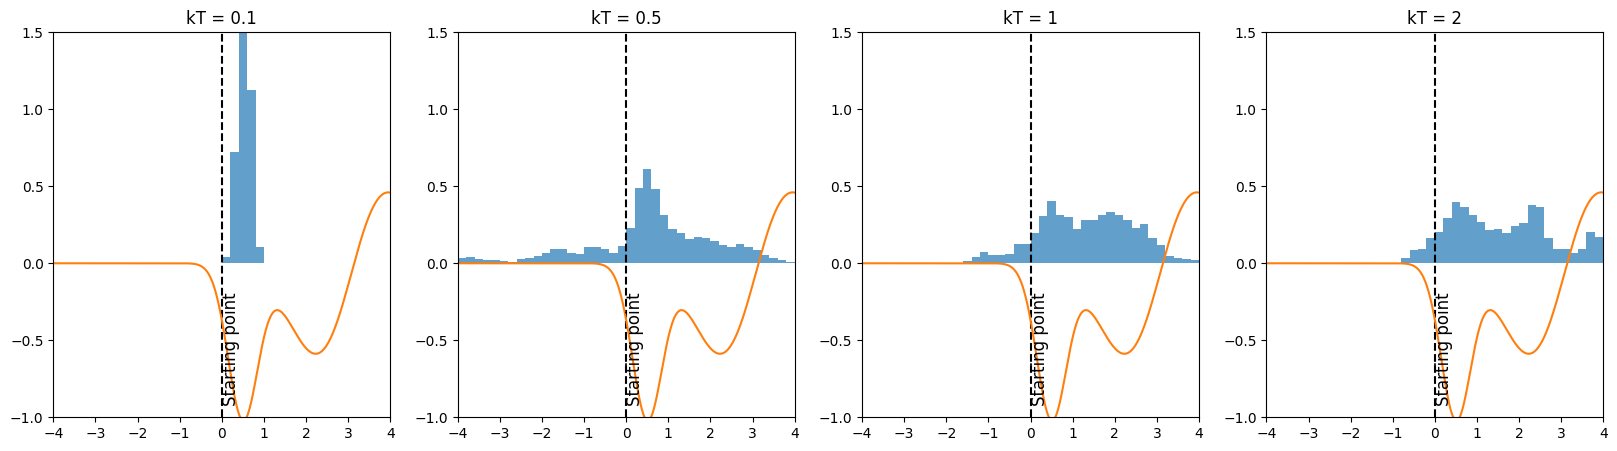

In [7]:
a,b = [0.5,0.5]
def custom_potential(x):
    potential = np.sin(x) * (- np.exp(-a*(x-3)**2)) - np.exp(-((x-0.5)/b)**2)
    return potential

CustomPotential_RW = Potential(V = custom_potential, kT = 0.5, x_range = [-4, 4], N_bins = 40, type = 'Custom', delta_x = 0.1)

N = 1e4
kTs= [0.1, 0.5, 1, 2]
fig, axs = plt.subplots(1,4, figsize=(20,5))


initial_point = 0
for kT, ax in zip(kTs, axs):
    CustomPotential_RW.kT = kT
    
    ax.axvline(x=initial_point, color='black', linestyle='--', label='Starting point')
    ax.text(x=initial_point, y=-0.9, s='Starting point', fontsize=12, color='black', rotation=90)
    ax.set(xlim=(-4, 4), ylim=(-1, 1.5))
    
    CustomPotential_RW.plot_mcmc(ax, N = int(N), initial_point=initial_point)
    CustomPotential_RW.plot_V(ax)
    ax.set_title(f'kT = {kT}')


plt.savefig('Figures/CustomPotential_RW, Varying Temperatures.png')

Accepted 6107 out of 9999 samples: 61.1% acceptance rate
Accepted 2363 out of 3892 samples: 60.7% acceptance rate
Accepted 4683 out of 7636 samples: 61.3% acceptance rate
Accepted 3308 out of 5316 samples: 62.2% acceptance rate


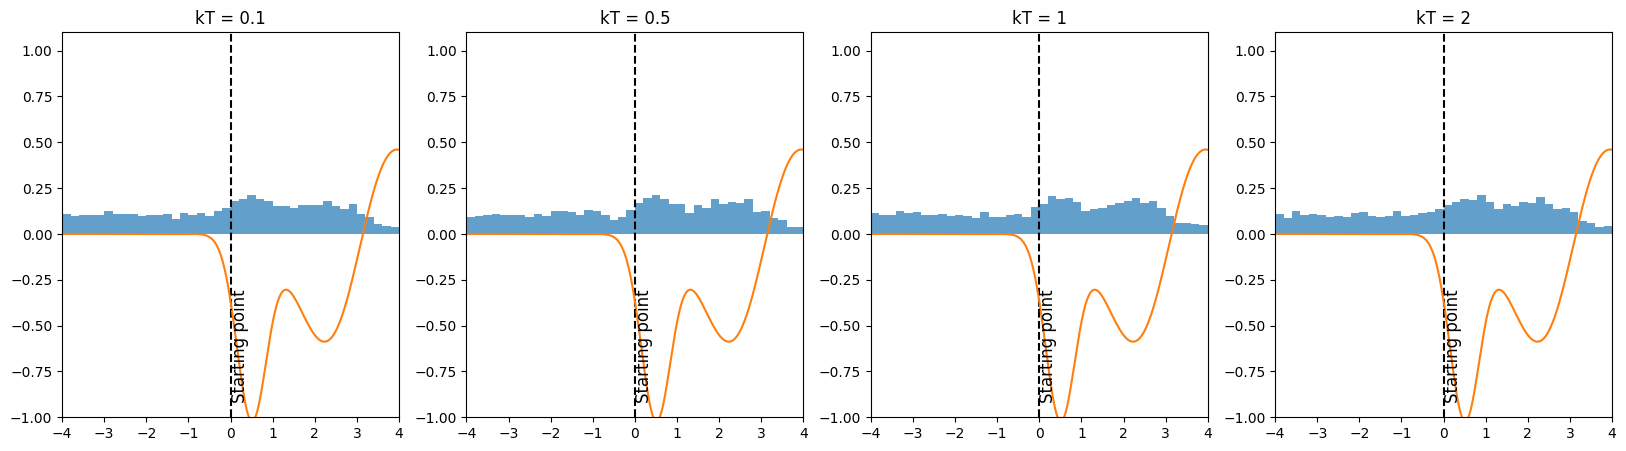

In [9]:
CustomPotential_Uniform = Potential(V= custom_potential, kT = 0.5, x_range = [-4, 4], N_bins = 40, type = 'Custom', method = 'Uniform')
5
Ns_for_MCMC = np.logspace(2,5 , 4)
fig, axs = plt.subplots(1,4, figsize=(20,5))

N = 1e4
kTs= [0.1, 0.5, 1, 2]
initial_point = 0
for kT, ax in zip(kTs, axs):
    CustomPotential_RW.kT = kT
    
    ax.axvline(x=initial_point, color='black', linestyle='--', label='Starting point')
    ax.text(x=initial_point, y=-0.9, s='Starting point', fontsize=12, color='black', rotation=90)
    ax.set(xlim=(-4, 4), ylim=(-1, 1.1))
    CustomPotential_Uniform.plot_mcmc(ax, N = int(N), initial_point=initial_point)
    CustomPotential_Uniform.plot_V(ax)
    ax.set_title(f'kT = {kT}')

plt.savefig('Figures/CustomPotential_Uniform, Varying N.png')